In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, discriminant_analysis, cluster, preprocessing
import seaborn as sns
from scipy import stats

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

### Признаки:

1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_project** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

### Задание 1
Загрузите файл HR.csv в pandas dataframe. (5)

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). (10)

In [5]:
df.describe() #среднее, мин/макс, среднее отколнение (а также квартили)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.median() #медиана

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
df.mode() #мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. (10)

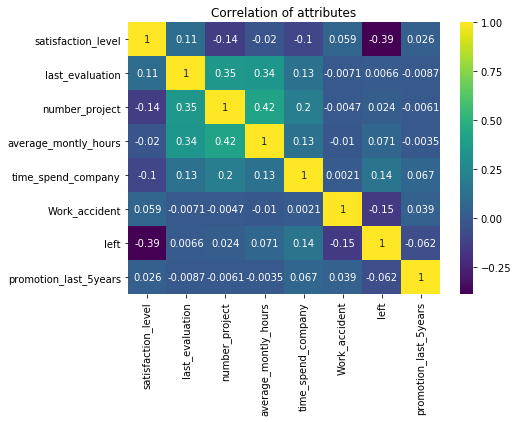

In [79]:
cat_col = ['department', 'salary']
num_col = [feature for feature in df.columns if feature not in cat_col]

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df[num_col].corr(), annot = True, cmap = 'viridis')
ax.set_title('Correlation of attributes')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

- Две наиболее скоррелированные величены - это average_monthly_hours (среднее количество часов на рабочем месте за месяц) и number_project (количество выполненных проектов за все время). Чем больше времени человек проводит на работе, тем больше проектов выполняет.
- Две наименее скоррелированные величены - это work_accident (несчастные случаи на работе) и time_spend_company (стаж работы в компании). Видимо, несчастные случаи больше зависят от самого человека (или, например, отдела), чем от длительности работы. 

### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте. (5)

In [19]:
df[['department', 'satisfaction_level']].groupby('department').count().rename(columns={'satisfaction_level': 'amount_workers'})

,amount_workers
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


### Задание 5
Показать распределение сотрудников по зарплатам. (5)

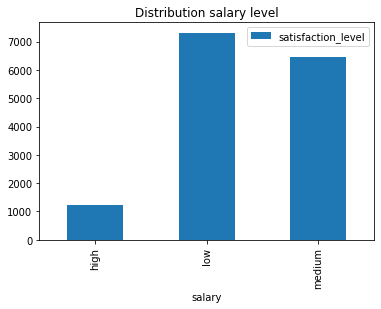

In [45]:
#Так как все, что все, что нам известно о зарплате сотрудников - это ее относительный уровень (низкий, средний, высокий), 
#то самое рациональное отразить количество сотрудников по каждому уровнб зарплат
salary_data = df[['salary', 'satisfaction_level']].groupby('salary').count()
salary_data.plot(kind='bar', title = 'Distribution salary level')
plt.show()

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности. (5)

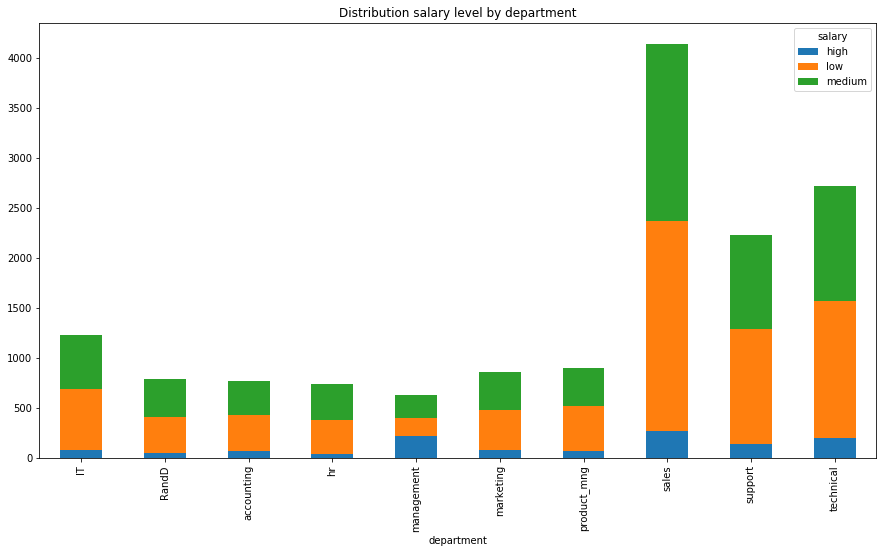

In [44]:
salary_data = df[['salary', 'satisfaction_level', 'department']].groupby(['department', 'salary']).count()
salary_data = salary_data.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level')

salary_data.plot(kind = 'bar', stacked = True, figsize=(15, 8), title = 'Distribution salary level by department')
plt.show()

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. (10)

In [52]:
high_salary = df[df.salary == 'high']['average_montly_hours'].values
low_salary = df[df.salary == 'low']['average_montly_hours'].values

Используем 2-выборочный критерий T-student, чтобы сравнить среднее количество часов для разного уровня зарплат.
За нулевую гипотезу H0 примем равенства двух выборок. За альтернативную H1 - что среднее количество часов для выборки и высокой зарплатой больше, чем для аналогичной выборки с низкой зарплатой. Порогом выставим уровень значимости = 5%.

In [58]:
alpha = 0.05
result = stats.ttest_ind(high_salary, low_salary, equal_var=False)
print(result)
if (result.statistic > 0) & (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Недостаточно данных, не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Недостаточно данных, не отвергаем нулевую гипотезу


### Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов 

(10)

In [69]:
# Уволившиеся
left = df[df.left == 1]
level_up_l = left['promotion_last_5years'].mean() #доля повышенных
mean_satisfaction_l = left['satisfaction_level'].mean() #среднее число рабочих часов
mean_project_l = left['number_project'].mean() #среднее количество проектов

In [70]:
# Работающие
work = df[df.left == 0]
level_up_w = work['promotion_last_5years'].mean() #доля повышенных
mean_satisfaction_w = work['satisfaction_level'].mean() #среднее число рабочих часов
mean_project_w = work['number_project'].mean() #среднее количество проектов

In [72]:
#Сведем результаты в одну таблицу, чтобы легче воспринимать данные и формулировать гипотезы в дальнейшем
d = {'level_up': [level_up_l, level_up_w], 
     'mean_satisfaction': [mean_satisfaction_l, mean_satisfaction_w], 
     'mean_project': [mean_project_l, mean_project_w]}
ind = ['left', 'work']
stat_left = pd.DataFrame(data = d, index = ind)
stat_left

,level_up,mean_satisfaction,mean_project
left,0.005321,0.440098,3.855503
work,0.026251,0.666810,3.786664


### Задание 9
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки. (20)

In [95]:
np.random.seed(42)
num_col = [feature for feature in df.columns if feature not in cat_col]
num_col.remove('left')
X = df[num_col]
y = df['left']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)

In [96]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Score =', round(score, 3))

Score = 0.756


Дополнениние:
Можно было бы также построить график, для приятной глазу визуализации. Мы могли бы выбрать 2 признака, которые больше всего коррелирют с целевой переменной. Либо же составить попарные графики распредления фичей и выбрать те, по которым наиболее наглядно мыжно различить 2 класса. И в итоге построить точечный график на осях этих двух фичей, добавив цветовую карту в соответствии с значениями целевой переменной. 

### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку. (5)

Таки сделано!